# Report 1

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.linalg import svd
from sklearn.preprocessing import StandardScaler
from matplotlib import cm
from matplotlib.lines import Line2D

### Data and EDA

In [31]:
pathname = 'Data/SAheart.data.txt'
data = pd.read_csv(pathname, sep=",", header=0, index_col='row.names')

data

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
row.names,,,,,,,,,,
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0


In [32]:
# Give an account of whether there are data issues (i.e., missing values or corrupted data) and describe them if so.

missing_data = data.isnull().sum()
missing_data[missing_data > 0]

Series([], dtype: int64)

In [46]:
# Include basic summary statistics of the attributes.
numeric_columns = ['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']


print(f'The dataset has {data.shape[0]} rows and {data.shape[1]} columns.')
data[numeric_columns].describe()

The dataset has 462 rows and 10 columns.


,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000


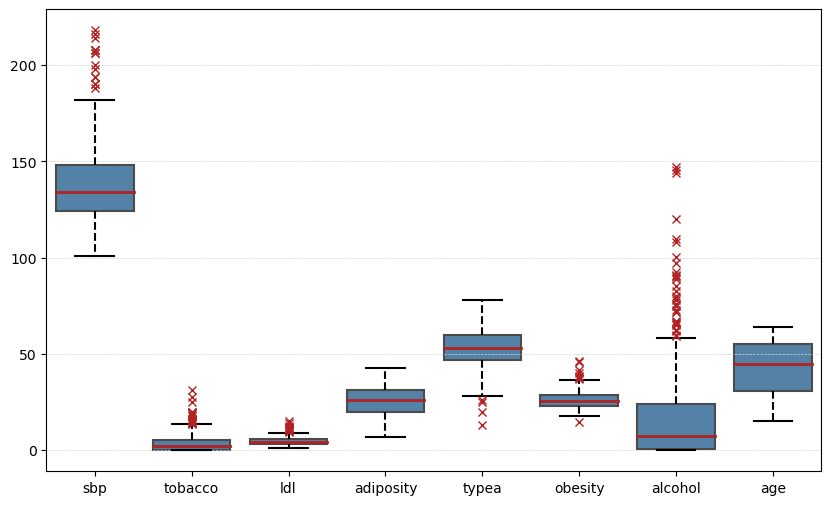

In [45]:
# Are there issues with outliers in the data?

plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(data=data[numeric_columns], 
                      color='steelblue', 
                      showcaps=True, 
                    #   fill=False,
                      flierprops=dict(marker='x', color='firebrick', markersize=6, markeredgecolor='firebrick'),
                      medianprops=dict(color='firebrick', linewidth=2),
                      whiskerprops=dict(color='black', linewidth=1.5, linestyle='dashed'),
                      capprops=dict(color='black', linewidth=1.5))

plt.grid(True, which='both', axis='y', color='lightgray', linestyle='--', linewidth=0.5)
plt.xticks()
plt.show()

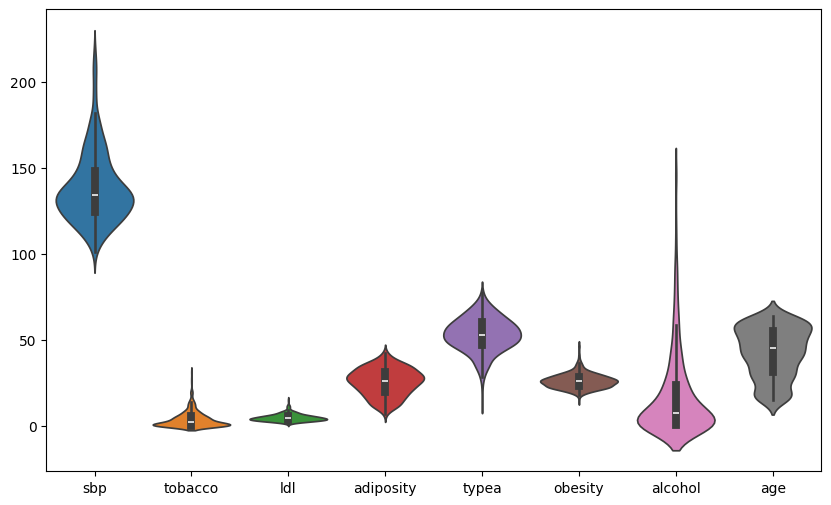

In [6]:
plt.figure(figsize=(10, 6))
boxplot = sns.violinplot(data=data[numeric_columns])

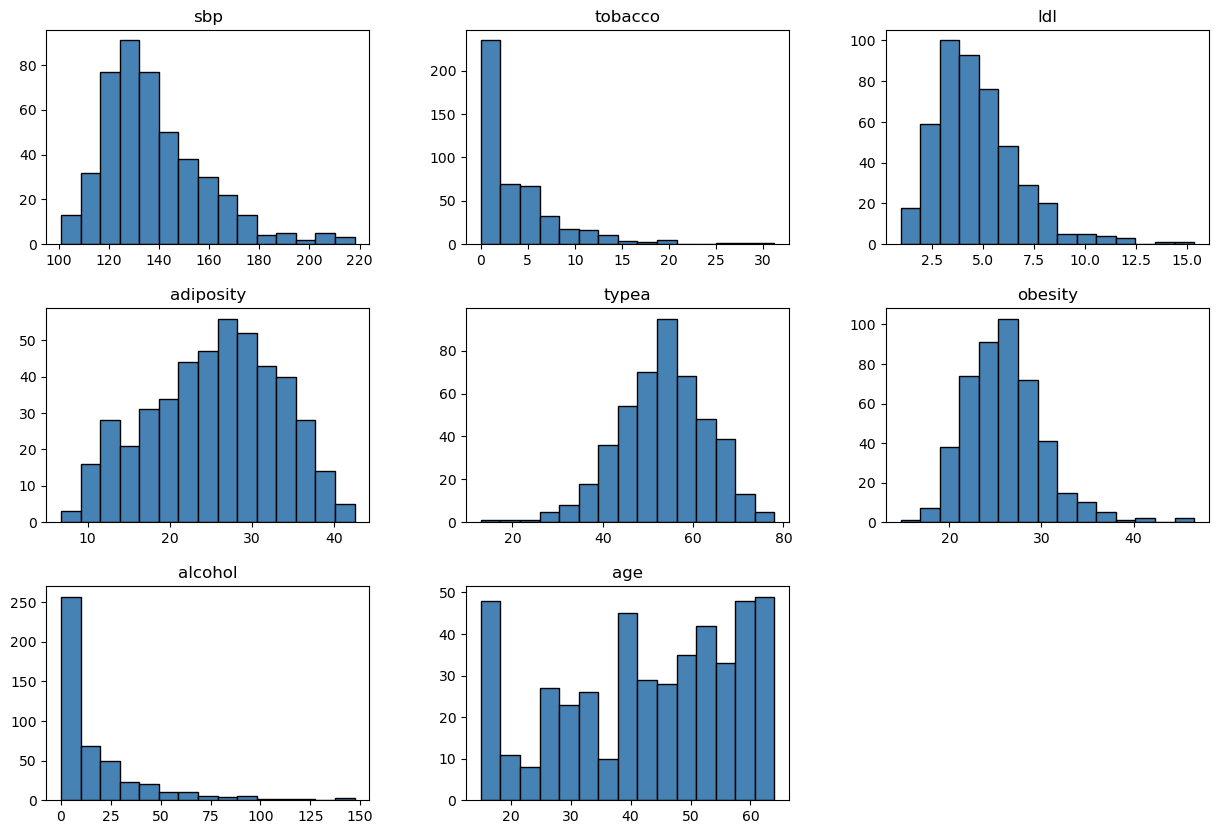

In [35]:
# Do the attributes appear to be normally distributed?

data[numeric_columns].hist(bins=15, figsize=(15, 10), color='steelblue', edgecolor='black', grid=False)
plt.show()

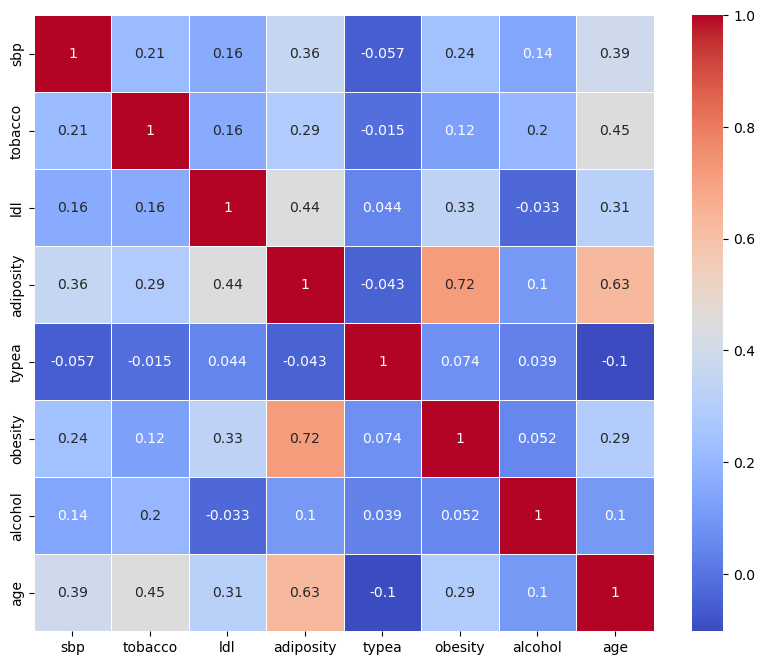

In [36]:
# Are variables correlated?

plt.figure(figsize=(10, 8))
correlation_matrix = data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

Does the primary machine learning modeling aim appear to be feasible based on your visualizations?

- The primary machine learning modeling aim was a classification task

### PCA

In [37]:
# One column in the dataframe that is not a numeric value
data['famhist'] = data['famhist'].map({'Present': 1, 'Absent': 0})

In [38]:
# Splitting the variables and target data
X = np.asarray(data.iloc[:, :-1].values)
y = np.asarray(data['chd'].values) 

# Only continuous variables for PCA
X_continuous = data[numeric_columns].values

# Some basic variables following the class exercises
N = len(y) #samples
M = X.shape[1] #features
C = len(np.unique(y))  #unique classes

In [39]:
# Normalizing the data for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_continuous)

# Centering the data for PCA
Y = X_scaled - np.ones((X_scaled.shape[0], 1)) * X_scaled.mean(axis=0) #subtracts mean value from data

In [40]:
# Computing singular value decomposition (SVD) of y 
U, S, Vh = svd(Y, full_matrices=False)

# Computing the amount of variance explained by the principal components
rho = (S * S) / (S * S).sum()

C:\Users\desus\AppData\Local\Temp\ipykernel_4708\1188904123.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([1, len(rho)], [threshold, threshold], "k--", color='green')
C:\Users\desus\AppData\Local\Temp\ipykernel_4708\1188904123.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([1, len(rho)], [threshold_, threshold_], "k--", color='black')


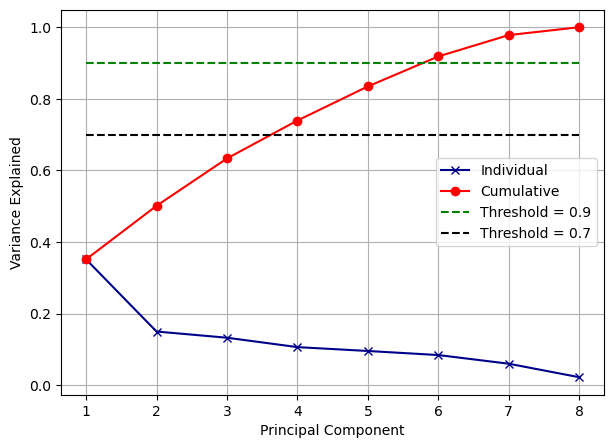

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

threshold = 0.9
threshold_ = 0.7

ax.plot(range(1, len(rho) + 1), rho, "x-", color='darkblue')
ax.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-", color='red')
ax.plot([1, len(rho)], [threshold, threshold], "k--", color='green')
ax.plot([1, len(rho)], [threshold_, threshold_], "k--", color='black')
ax.set_xlabel("Principal Component")
ax.set_ylabel("Variance Explained")
ax.legend(["Individual", "Cumulative", "Threshold = 0.9", "Threshold = 0.7"])
ax.grid()




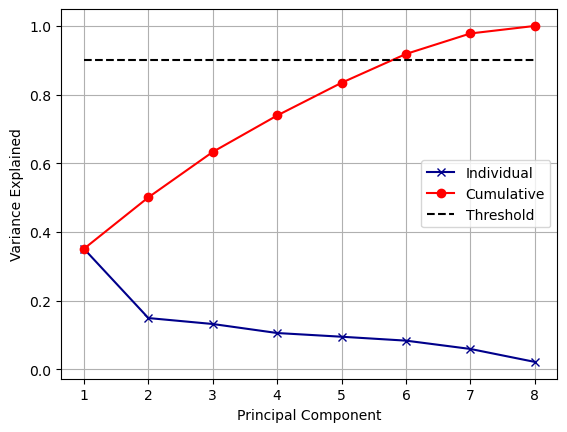

In [41]:
# Following class exercises week 3, we can use this plot to see how many principal components explain which amount of variance
threshold = 0.9
plt.figure()
plt.plot(range(1, len(rho) + 1), rho, "x-", color='darkblue')
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-", color='red')
plt.plot([1, len(rho)], [threshold, threshold], "k--")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.legend(["Individual", "Cumulative", "Threshold"])
plt.grid()
plt.show()

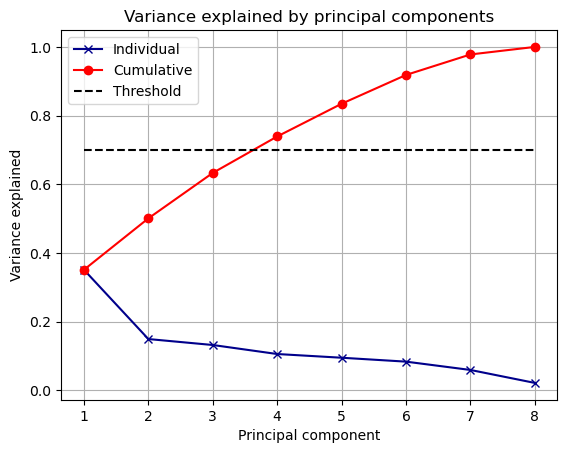

In [42]:
# Following class exercises week 3, we can use this plot to see how many principal components explain which amount of variance
threshold = 0.7
plt.figure()
plt.plot(range(1, len(rho) + 1), rho, "x-", color='darkblue')
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-", color='red')
plt.plot([1, len(rho)], [threshold, threshold], "k--")
plt.title("Variance explained by principal components")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.legend(["Individual", "Cumulative", "Threshold"])
plt.grid()
plt.show()

#no discrete

In [43]:
# Vh is the Hermitian (transpose)of the vector V - so we transpose to get V:
V = Vh.T

# Projecting the centered data onto principal component space
Z = Y @ V

# We want to use 7 principal components to explain 90% variance
Z_7 = Z[:, :7]

# Storing the new dataframe
pca_df = pd.DataFrame(Z_7, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])
pca_df['Class'] = y

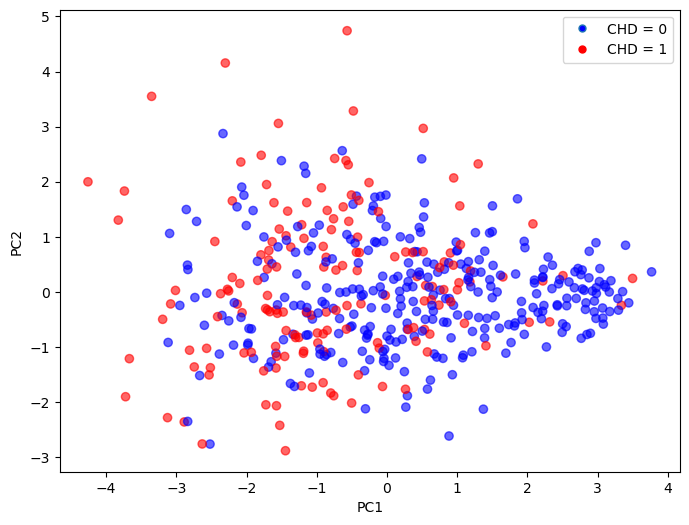

In [85]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Class'], cmap='bwr', alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')

# access legend objects automatically created from data
handles, labels = plt.gca().get_legend_handles_labels()

point2 = Line2D([0], [0], label='CHD = 1', marker='o', markersize=5, linestyle='',  markerfacecolor='red', markeredgecolor='r')
point1 = Line2D([0], [0], label='CHD = 0', marker='o', markersize=5, linestyle='',  markerfacecolor='blue')

# add manual symbols to auto legend
handles.extend([point1, point2])

plt.legend(handles=handles)

# plt.legend()

plt.show()


Dimensionality reduction is now performed and stored in the `pca_df` dataframe. When it comes to visualizing, we have a 7 different principal components that are needed to explain more than 0.9 of our variance, so we can either visualize some principal components, like it is done above. Or, we can create a grid of all combination, like it is done below.

/var/folders/4c/59p2rqsj48xfpn9phsy9l6_40000gn/T/ipykernel_75808/75833899.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('bwr', len(np.unique(pca_df['Class'])))


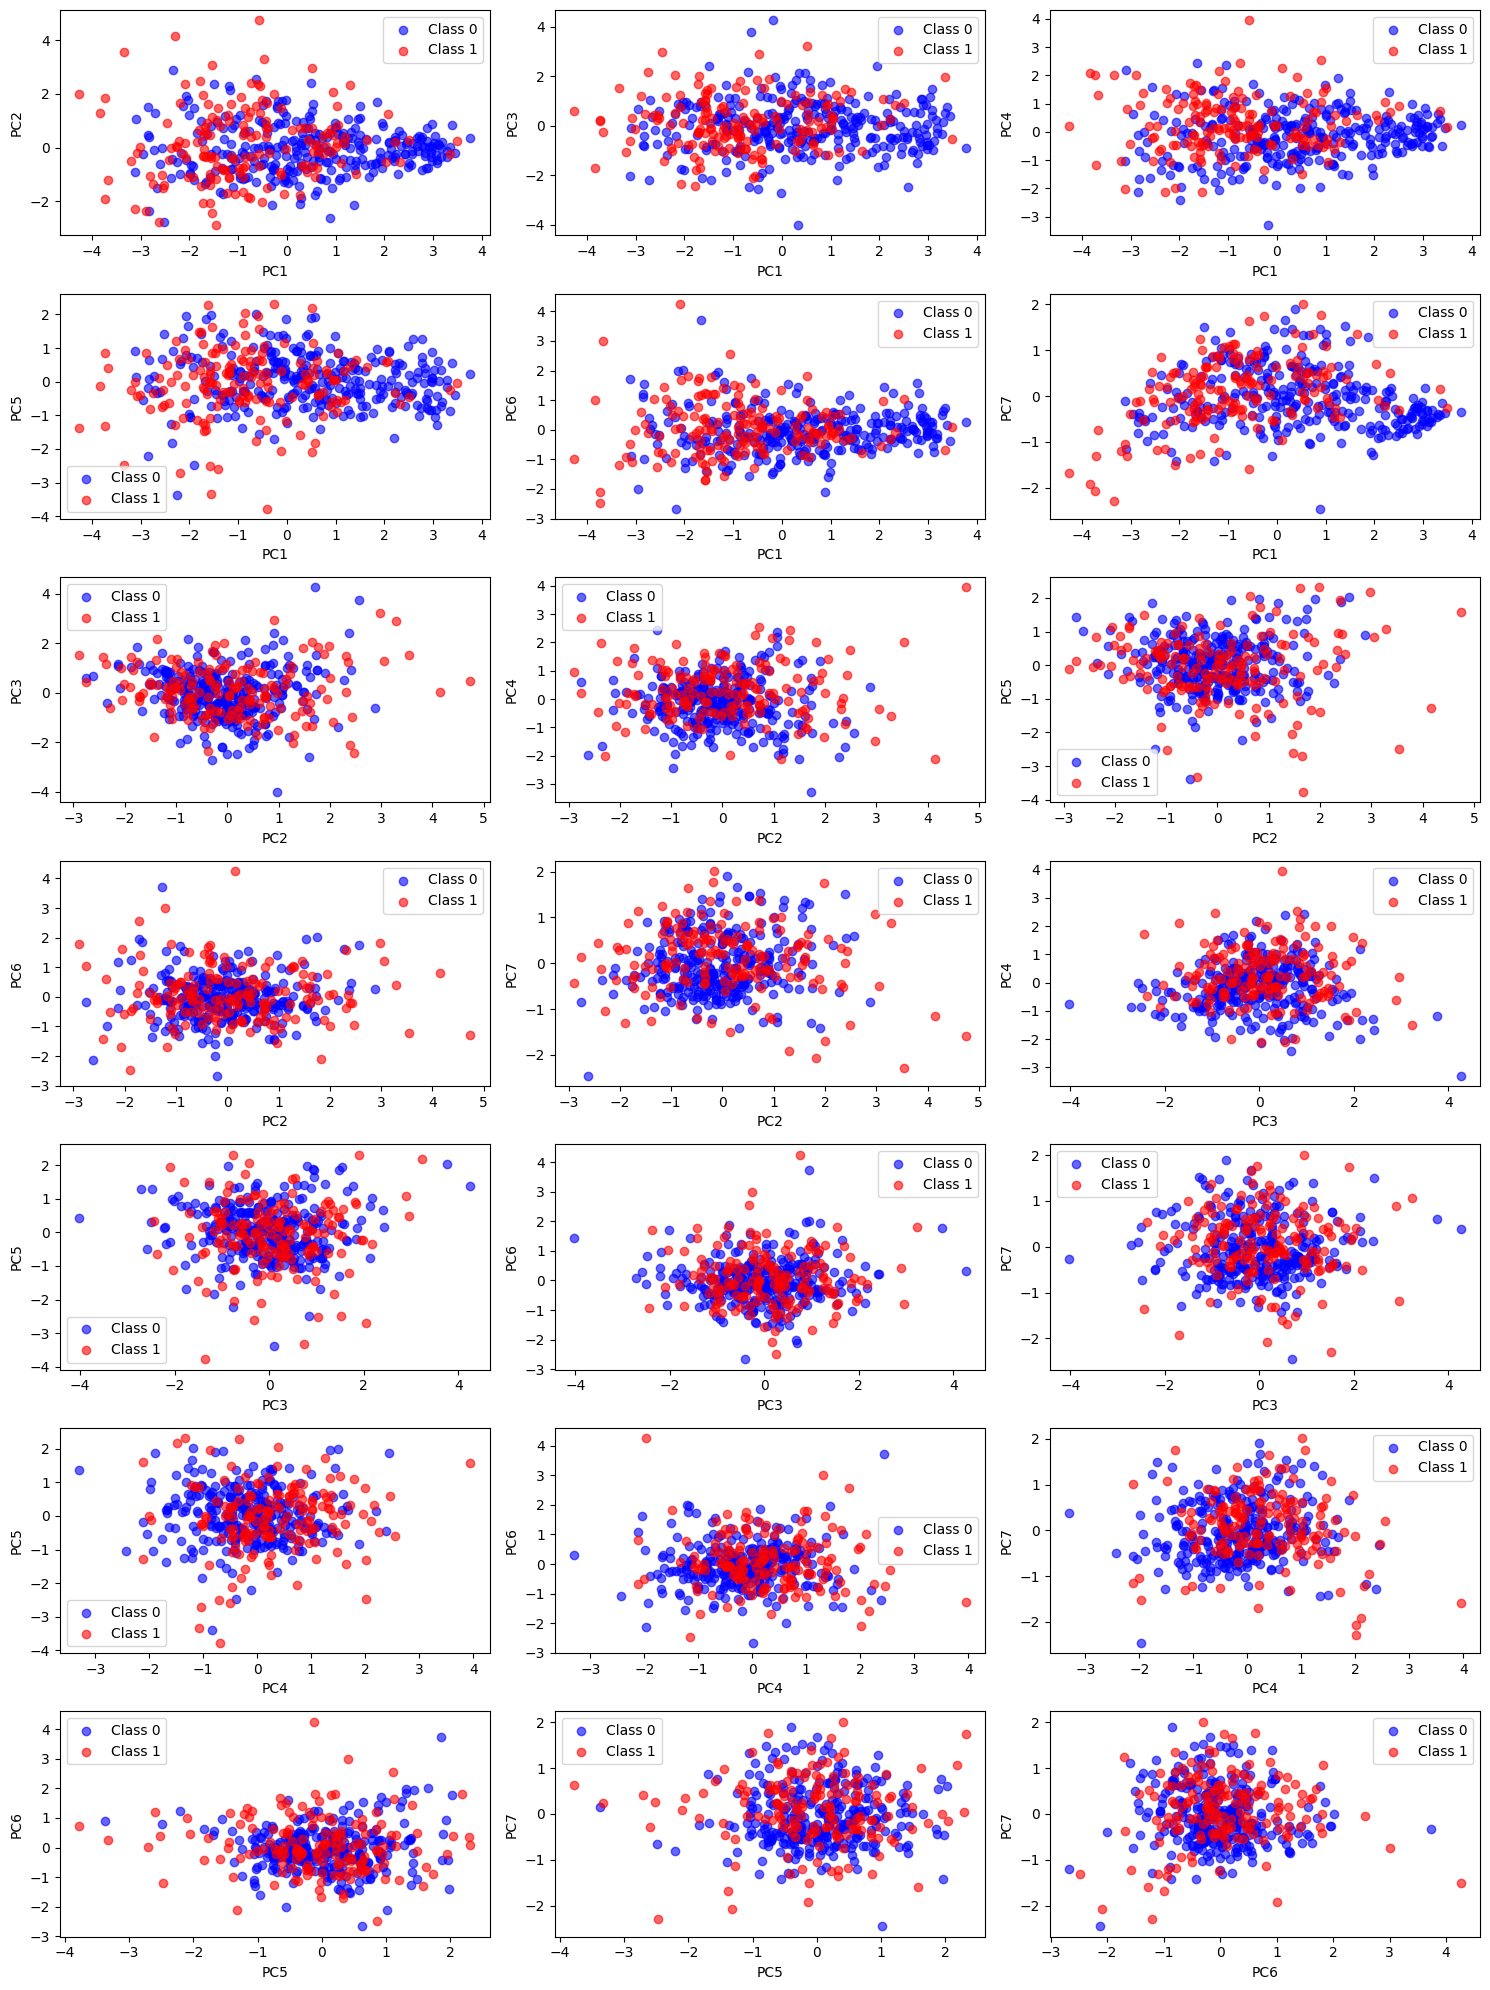

In [17]:
i = 0
j = 1

fig, axs = plt.subplots(7, 3, figsize=(15, 20))
pairs = [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), 
         (2, 3), (2, 4), (2, 5), (2, 6), (3, 4), (3, 5), (3, 6), (4, 5), (4, 6), (5, 6)]

cmap = cm.get_cmap('bwr', len(np.unique(pca_df['Class'])))

for index, (i, j) in enumerate(pairs):
    ax = axs[index // 3, index % 3]
    for c_idx, c in enumerate(np.unique(pca_df['Class'])):
        class_mask = (pca_df['Class'] == c)
        ax.scatter(pca_df[class_mask]['PC' + str(i + 1)], 
                   pca_df[class_mask]['PC' + str(j + 1)],
                   label=f'Class {c}', color=cmap(c_idx), alpha=0.6)
    
    ax.set_xlabel(f"PC{i + 1}")
    ax.set_ylabel(f"PC{j + 1}")
    ax.legend()

plt.tight_layout()
plt.show()

In [86]:
loadings = pd.DataFrame(V[:, :7], index=numeric_columns, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])

loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
sbp,-0.333668,0.238534,-0.070633,0.299715,-0.775297,0.275126,0.244957
tobacco,-0.309586,0.458580,0.096235,-0.584819,0.112384,-0.253730,0.513341
ldl,-0.337173,-0.363917,-0.014412,-0.303958,0.225390,0.769669,0.115367
adiposity,-0.527753,-0.187406,-0.034407,0.157912,0.124223,-0.202311,-0.158947
typea,0.024248,-0.282611,0.830983,-0.265589,-0.353725,-0.081221,-0.157782
obesity,-0.412804,-0.391710,0.120532,0.372191,0.159884,-0.359273,0.334580
alcohol,-0.120336,0.542817,0.504180,0.428926,0.402117,0.278877,-0.110836
age,-0.463829,0.193114,-0.158429,-0.240396,-0.087579,-0.114721,-0.699127
